Successfully imported
There is 1892 missing data in our dataset
Unique values in "work_interfere" column: ['Often' 'Rarely' 'Never' 'Sometimes' nan]


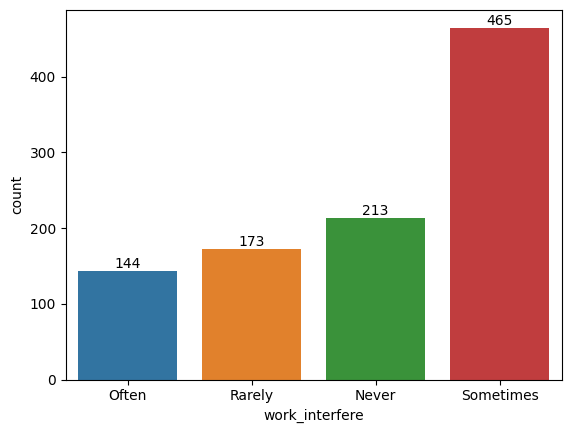

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('Successfully imported')
data = pd.read_csv('survey.csv')
data.head()

if data.isnull().sum().sum() == 0:
    print('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset'.format(data.isnull().sum().sum()))

frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis=1, sort=False)
work_interfere_unique_values = data['work_interfere'].unique()
print('Unique values in "work_interfere" column:', work_interfere_unique_values)

ax = sns.countplot(data=data, x='work_interfere')
# Add the value of each parameter on the Plot
ax.bar_label(ax.containers[0])
plt.show()


['Female' 'Male' 'Other']
There is no missing data
There is 4 duplicated data:
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


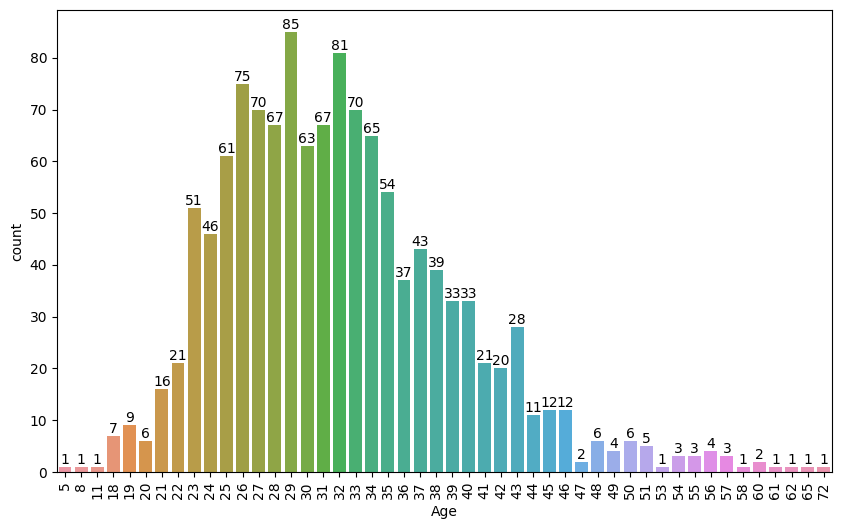

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop unnecessary columns
columns_to_drop = ['state', 'comments', 'Timestamp']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])

# Fill in missing values in the 'work_interfere' and 'self_employed' columns
data['work_interfere'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(data['work_interfere'].values.reshape(-1, 1)))
data['self_employed'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(data['self_employed'].values.reshape(-1, 1)))

# Clean and standardize the 'Gender' column
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace=True)
data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)', 'woman'], 'Female', inplace=True)
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'], 'Other', inplace=True)

# Count unique values in the 'Gender' column
print(data['Gender'].unique())

# Check for missing data
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

# Check for duplicated data
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))

# Drop duplicated data if it exists
data.drop_duplicates(inplace=True)

# Remove outliers in the 'Age' column
data.drop(data[data['Age'] < 0].index, inplace=True)
data.drop(data[data['Age'] > 99].index, inplace=True)

# Count unique values in the 'Age' column
print(data['Age'].unique())

# Plot the age distribution
plt.figure(figsize=(10, 6))
age_range_plot = sns.countplot(data=data, x='Age')
age_range_plot.bar_label(age_range_plot.containers[0])
plt.xticks(rotation=90)

plt.show()
